# Introducing Keras 

[`keras`](https://keras.io/) is a library designed to simplify the access to deep learning functionality of TensorFlow (and Theano, but we will not touch on that at all).

We will use a few functions from [`scikit-learn`](http://scikit-learn.org) to generate data sets:

In [1]:
from sklearn.datasets import make_blobs, make_circles, make_moons
from sklearn.model_selection import train_test_split

Numpy and Matplotlib are always good to have...

In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

We'll also set up some configuration variables up-front:

In [3]:
# Configuration variables:
num_labels = 2    # The number of labels.
NUM_EPOCHS = 5
NUM_HIDDEN = 5
BATCH_SIZE = 100  # The number of training examples to use per training step.
n_train = 1000
n_test = 200

And set up a function to generate datasets from functions in `scikit-learn`:

In [4]:
def generate_dataset(func, n_train=n_train, n_test=n_test, num_labels=num_labels, **kwargs):
    """ Create synthetic classification data-sets
    
    Parameters 
    ----------
    func : one of {`make_blobs`, `make_circles`, `make_moons`}
        What kind of data to make.
    n_train : int
        The size of the training set.
    n_test : int
        The size of the test set.
    num_labels : int
        The number of classes.
    
    Returns
    -------
    train_data, test_data : 2D arrays
        Dimensions: {n_train, n_test} by 2
    train_labels, test_labels: one-hot encoder arrays
        These have dimensions {n_train, n_test} by num_labels
    """
    fvecs, labels = func(n_train + n_test, **kwargs)
    # We need the one-hot encoder!
    labels_onehot = (np.arange(num_labels) == labels[:, None])
    train_data, test_data, train_labels, test_labels = train_test_split(fvecs.astype(np.float32), 
                                                                        labels_onehot.astype(np.float32), 
                                                                        train_size=n_train)
    return train_data, test_data, train_labels, test_labels 

### The first example is a linearly separable data-set:

In [5]:
train_data, test_data, train_labels, test_labels = generate_dataset(make_blobs, n_train=1000, n_test=200, 
                                                                    centers=2, center_box=[-4., 4.])

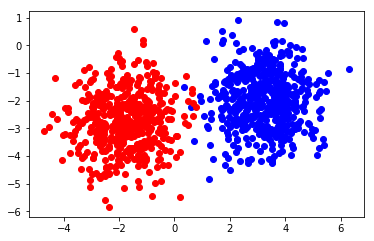

In [6]:
fig, ax = plt.subplots(1)
ax.plot(train_data[np.where(train_labels[:, 0]), 0], train_data[np.where(train_labels[:, 0]), 1], 'bo')
ax.plot(train_data[np.where(train_labels[:, 1]), 0], train_data[np.where(train_labels[:, 1]), 1], 'ro')
ax.set_aspect('equal')

In [7]:
train_labels = np.where(train_labels)[1]
test_labels = np.where(test_labels)[1]

In [8]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

Using TensorFlow backend.


In [9]:
import keras.layers as kl

In [10]:
model = Sequential()
model.add(Dense(1, input_dim=2, init='uniform', bias=False))
#model.add(Dropout(0.5))
#model.add(Dense(64, activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

/Users/arokem/anaconda3/lib/python3.5/site-packages/keras/legacy/interfaces.py:86: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="uniform", use_bias=False, input_dim=2)`
  '` call to the Keras 2 API: ' + signature)


In [11]:
model.fit(train_data, train_labels, nb_epoch=10, batch_size=BATCH_SIZE)

/Users/arokem/anaconda3/lib/python3.5/site-packages/keras/models.py:826: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/10
1000/1000 [==============================] - 1s - loss: 0.6539 - acc: 0.7810      
Epoch 2/10
1000/1000 [==============================] - 0s - loss: 0.6379 - acc: 0.9400     
Epoch 3/10
1000/1000 [==============================] - 0s - loss: 0.6250 - acc: 0.9770     
Epoch 4/10
1000/1000 [==============================] - 0s - loss: 0.6127 - acc: 0.9870     
Epoch 5/10
1000/1000 [==============================] - 0s - loss: 0.6004 - acc: 0.9930     
Epoch 6/10
1000/1000 [==============================] - 0s - loss: 0.5882 - acc: 0.9920     
Epoch 7/10
1000/1000 [==============================] - 0s - loss: 0.5761 - acc: 0.9900     
Epoch 8/10
1000/1000 [==============================] - 0s - loss: 0.5641 - acc: 0.9910     
Epoch 9/10
1000/1000 [==============================] - 0s - loss: 0.5521 - acc: 0.9930     
Epoch 10/10
1000/1000 [==============================] - 0s - loss: 0.5401 - acc: 0.9920     


In [12]:
loss_and_metrics = model.evaluate(test_data, test_labels, batch_size=BATCH_SIZE)

100/200 [==============>...............] - ETA: 0s

In [13]:
for name, metric in zip(model.metrics_names, loss_and_metrics):
    print(name, ":", metric)

loss : 0.532893359661
acc : 0.990000009537


In [14]:
cls_idx = np.round(model.predict(test_data)).astype(int).squeeze()
cls_np = np.zeros((cls_idx.shape[0], 2))
cls_np[np.arange(cls_np.shape[0]), cls_idx] = 1

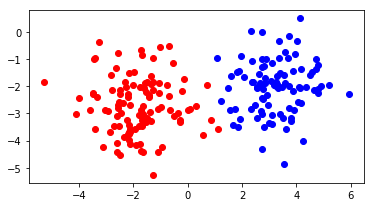

In [15]:
fig, ax = plt.subplots(1)
ax.plot(test_data[np.where(cls_np[:, 0]), 0], test_data[np.where(cls_np[:, 0]), 1], 'bo')
ax.plot(test_data[np.where(cls_np[:, 1]), 0], test_data[np.where(cls_np[:, 1]), 1], 'ro')
ax.set_aspect('equal')

### The next set of data is not linearly separable:

In [16]:
train_data, test_data, train_labels, test_labels = generate_dataset(make_moons, n_train=1000, n_test=200, noise=0.2)

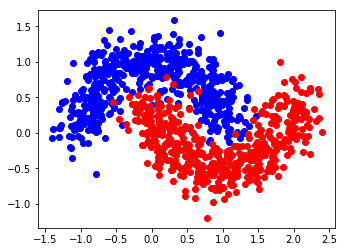

In [17]:
fig, ax = plt.subplots(1)
ax.plot(train_data[np.where(train_labels[:, 0]), 0], train_data[np.where(train_labels[:, 0]), 1], 'bo')
ax.plot(train_data[np.where(train_labels[:, 1]), 0], train_data[np.where(train_labels[:, 1]), 1], 'ro')
ax.set_aspect('equal')

In [18]:
train_labels = np.where(train_labels)[1]
test_labels = np.where(test_labels)[1]

In [19]:
model.fit(train_data, train_labels, nb_epoch=10, batch_size=BATCH_SIZE)

Epoch 1/10
1000/1000 [==============================] - 0s - loss: 0.7165 - acc: 0.3630     
Epoch 2/10
1000/1000 [==============================] - 0s - loss: 0.7133 - acc: 0.3780     
Epoch 3/10
1000/1000 [==============================] - 0s - loss: 0.7098 - acc: 0.3930     
Epoch 4/10
1000/1000 [==============================] - 0s - loss: 0.7059 - acc: 0.4170     
Epoch 5/10
1000/1000 [==============================] - 0s - loss: 0.7018 - acc: 0.4340     
Epoch 6/10
 100/1000 [==>...........................] - ETA: 0s - loss: 0.7011 - acc: 0.4600

/Users/arokem/anaconda3/lib/python3.5/site-packages/keras/models.py:826: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


1000/1000 [==============================] - 0s - loss: 0.6977 - acc: 0.4570     
Epoch 7/10
1000/1000 [==============================] - 0s - loss: 0.6936 - acc: 0.4950     
Epoch 8/10
1000/1000 [==============================] - 0s - loss: 0.6895 - acc: 0.5380     
Epoch 9/10
1000/1000 [==============================] - 0s - loss: 0.6854 - acc: 0.5830     
Epoch 10/10
1000/1000 [==============================] - 0s - loss: 0.6813 - acc: 0.6230     


In [20]:
loss_and_metrics = model.evaluate(test_data, test_labels, batch_size=BATCH_SIZE)
print()
for name, metric in zip(model.metrics_names, loss_and_metrics):
    print(name, ":", metric)

100/200 [==============>...............] - ETA: 0s
loss : 0.684205770493
acc : 0.615000009537


In [21]:
cls_idx = np.round(model.predict(test_data)).astype(int).squeeze()
cls = np.zeros((cls_idx.shape[0], 2))
cls[np.arange(cls.shape[0]), cls_idx] = 1

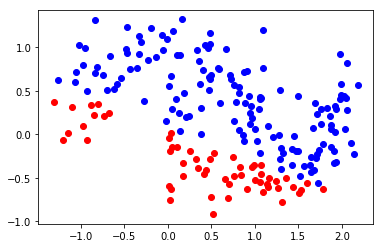

In [22]:
fig, ax = plt.subplots(1)
ax.plot(test_data[np.where(cls[:, 0]), 0], test_data[np.where(cls[:, 0]), 1], 'bo')
ax.plot(test_data[np.where(cls[:, 1]), 0], test_data[np.where(cls[:, 1]), 1], 'ro')
ax.set_aspect('equal')

In [23]:
train_data, test_data, train_labels, test_labels = generate_dataset(make_circles, n_train=1000, n_test=200, noise=0.2, factor=0.1)

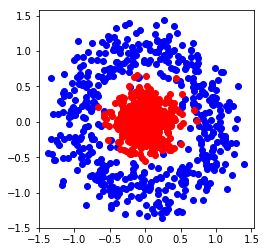

In [24]:
fig, ax = plt.subplots(1)
ax.plot(train_data[np.where(train_labels[:, 0]), 0], train_data[np.where(train_labels[:, 0]), 1], 'bo')
ax.plot(train_data[np.where(train_labels[:, 1]), 0], train_data[np.where(train_labels[:, 1]), 1], 'ro')
ax.set_aspect('equal')

In [25]:
train_labels = np.where(train_labels)[1]
test_labels = np.where(test_labels)[1]

In [26]:
model.fit(train_data, train_labels, nb_epoch=NUM_EPOCHS, batch_size=BATCH_SIZE)

Epoch 1/5
1000/1000 [==============================] - 0s - loss: 0.6943 - acc: 0.5520     
Epoch 2/5
1000/1000 [==============================] - 0s - loss: 0.6943 - acc: 0.5340     
Epoch 3/5
1000/1000 [==============================] - 0s - loss: 0.6943 - acc: 0.5240     
Epoch 4/5
1000/1000 [==============================] - 0s - loss: 0.6942 - acc: 0.5310     
Epoch 5/5
 100/1000 [==>...........................] - ETA: 0s - loss: 0.6987 - acc: 0.5000

/Users/arokem/anaconda3/lib/python3.5/site-packages/keras/models.py:826: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


1000/1000 [==============================] - 0s - loss: 0.6942 - acc: 0.5270     


In [27]:
loss_and_metrics = model.evaluate(test_data, test_labels, batch_size=BATCH_SIZE)
print()
for name, metric in zip(model.metrics_names, loss_and_metrics):
    print(name, ":", metric)

100/200 [==============>...............] - ETA: 0s
loss : 0.693578928709
acc : 0.545000016689


In [28]:
cls_idx = np.round(model.predict(test_data)).astype(int).squeeze()
cls = np.zeros((cls_idx.shape[0], 2))
cls[np.arange(cls.shape[0]), cls_idx] = 1

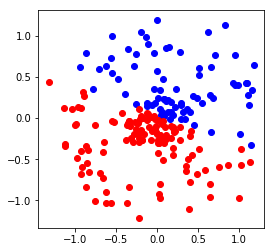

In [29]:
fig, ax = plt.subplots(1)
ax.plot(test_data[np.where(cls[:, 0]), 0], test_data[np.where(cls[:, 0]), 1], 'bo')
ax.plot(test_data[np.where(cls[:, 1]), 0], test_data[np.where(cls[:, 1]), 1], 'ro')
ax.set_aspect('equal')

In [30]:
model = Sequential()
model.add(Dense(64, input_dim=2, init='uniform', activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

/Users/arokem/anaconda3/lib/python3.5/site-packages/keras/legacy/interfaces.py:86: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(64, activation="relu", input_dim=2, kernel_initializer="uniform")`
  '` call to the Keras 2 API: ' + signature)


In [31]:
model.fit(train_data, train_labels, nb_epoch=NUM_EPOCHS, batch_size=BATCH_SIZE)
print()
loss_and_metrics = model.evaluate(test_data, test_labels, batch_size=BATCH_SIZE)
print()
for name, metric in zip(model.metrics_names, loss_and_metrics):
    print(name, ":", metric)

/Users/arokem/anaconda3/lib/python3.5/site-packages/keras/models.py:826: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/5
1000/1000 [==============================] - 1s - loss: 0.6799 - acc: 0.7210     
Epoch 2/5
1000/1000 [==============================] - 0s - loss: 0.6547 - acc: 0.8710     
Epoch 3/5
1000/1000 [==============================] - 0s - loss: 0.6283 - acc: 0.8790     
Epoch 4/5
1000/1000 [==============================] - 0s - loss: 0.5977 - acc: 0.8980     
Epoch 5/5
1000/1000 [==============================] - 0s - loss: 0.5634 - acc: 0.9010     

100/200 [==============>...............] - ETA: 0s
loss : 0.546644717455
acc : 0.935000002384


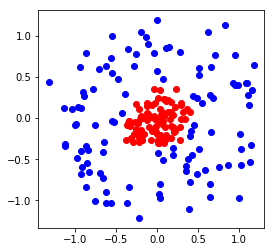

In [32]:
cls_idx = np.round(model.predict(test_data)).astype(int).squeeze()
cls = np.zeros((cls_idx.shape[0], 2))
cls[np.arange(cls.shape[0]), cls_idx] = 1
fig, ax = plt.subplots(1)
ax.plot(test_data[np.where(cls[:, 0]), 0], test_data[np.where(cls[:, 0]), 1], 'bo')
ax.plot(test_data[np.where(cls[:, 1]), 0], test_data[np.where(cls[:, 1]), 1], 'ro')
ax.set_aspect('equal')

In [33]:
import keras 

In [34]:
keras.__version__

'2.0.1'